<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/kaggle/kaggle_Malware_Detection_using_API_calls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/dkudata2/.kaggle'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/dkudata2/.kaggle
dynamic_api_call_sequence_per_malware_100_0_306.csv
kaggle.json
malware-analysis-datasets-api-call-sequences.zip
malware-analysis-datasets-pe-section-headers.zip
pe_section_headers.csv


In [ ]:
# 내 kaggle 토근의 위치 설정
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/gdrive/My Drive/dkudata2/.kaggle/"

!ls -l '/content/gdrive/My Drive/dkudata2/.kaggle'

total 23905
-rw------- 1 root root 17949131 Oct 24  2019 dynamic_api_call_sequence_per_malware_100_0_306.csv
-rw------- 1 root root       67 Nov 23 07:54 kaggle.json
-rw------- 1 root root  2117473 Nov 23 11:11 malware-analysis-datasets-api-call-sequences.zip
-rw------- 1 root root  1307424 Nov 23 07:54 malware-analysis-datasets-pe-section-headers.zip
-rw------- 1 root root  3102951 Aug 14  2019 pe_section_headers.csv


In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          17060        492  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           4531        109  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1045         32  1.0              
swaptr/layoffs-2022                                         Layoffs 2022        

In [ ]:
#We will use the malware analysis: API Call Sequences dataset
!kaggle datasets list -s ang3loliveira/malware-analysis-datasets-api-call-sequences

ref                                                         title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
ang3loliveira/malware-analysis-datasets-api-call-sequences  Malware Analysis Datasets: API Call Sequences   2MB  2019-10-24 02:01:43           1207         21  0.7058824        


In [ ]:
#Download & Unzip the dataset
!kaggle datasets download -d ang3loliveira/malware-analysis-datasets-api-call-sequences
!unzip malware-analysis-datasets-api-call-sequences.zip

malware-analysis-datasets-api-call-sequences.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  malware-analysis-datasets-api-call-sequences.zip
replace dynamic_api_call_sequence_per_malware_100_0_306.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
dataset = pd.read_csv("./dynamic_api_call_sequence_per_malware_100_0_306.csv")
dataset

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43871,e3d6d58faa040f0f9742c9d0eaf58be4,82,240,117,240,117,240,117,240,117,...,141,260,141,260,141,260,141,260,141,1
43872,9b917bab7f32188ae40c744f2be9aaf8,82,240,117,240,117,240,117,240,117,...,159,224,82,159,224,82,159,224,82,1
43873,35a18ee05f75f04912018d9f462cb990,82,240,117,240,117,240,117,240,117,...,260,141,260,141,260,141,260,141,260,1
43874,654139d715abcf7ecdddbef5a84f224b,82,240,117,240,117,240,117,240,117,...,141,260,141,260,141,260,141,260,141,1


In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
# Set input x and target y

x = dataset.drop(['malware',"hash"],axis=1)
y = dataset['malware']


In [ ]:
# Change datatype of APIs from integer to string
x = x.astype(dtype=str)
x = x.apply(list, axis=1) # to a list of 100 API calls
x = x.apply(' '.join)

In [ ]:
#split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Counter Vectorization & KNeighborsClassifier

In [ ]:
#Counter Vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [ ]:
#Lets make a model
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train,y_train)
y_pred = kNN.predict(x_test)

In [ ]:
# Show evaluation metrics
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test,y_pred,zero_division=1)))
print(classification_report(y_test,y_pred))


[[ 128  102]
 [  23 8523]]
Accuracy: 0.9857566089334548
F1 Score: 0.9927202842001047
              precision    recall  f1-score   support

           0       0.85      0.56      0.67       230
           1       0.99      1.00      0.99      8546

    accuracy                           0.99      8776
   macro avg       0.92      0.78      0.83      8776
weighted avg       0.98      0.99      0.98      8776



# HashingVectorizer & SVC

In [ ]:
#split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
cv = HashingVectorizer()
x_train1 = cv.fit_transform(x_train1)
x_test1 = cv.transform(x_test1)

In [ ]:
#make a model
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(x_train1, y_train1)
y_pred1=svc.predict(x_test1)

In [ ]:
# Show evaluation metrics
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
print(confmat)
accuracy = accuracy_score(y_pred1, y_test1)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test1,y_pred1,zero_division=1)))
print(classification_report(y_test1,y_pred1))


[[  68  162]
 [   3 8543]]
Accuracy: 0.9811987237921604
F1 Score: 0.9904353370819082
              precision    recall  f1-score   support

           0       0.96      0.30      0.45       230
           1       0.98      1.00      0.99      8546

    accuracy                           0.98      8776
   macro avg       0.97      0.65      0.72      8776
weighted avg       0.98      0.98      0.98      8776



#TfidfVectorizer & RandomForestClassifier

In [ ]:
#split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x_train2 = cv.fit_transform(x_train2)
x_test2 = cv.transform(x_test2)

In [ ]:
#make a model
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest.fit(x_train2,y_train2)
y_pred2=RandomForest.predict(x_test2)


In [ ]:
# Show evaluation metrics
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
print(confmat)
accuracy = accuracy_score(y_pred2, y_test2)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test2,y_pred2,zero_division=1)))
print(classification_report(y_test2,y_pred2))

[[ 138   92]
 [   7 8539]]
Accuracy: 0.9887192342752963
F1 Score: 0.9942364790126332
              precision    recall  f1-score   support

           0       0.95      0.60      0.74       230
           1       0.99      1.00      0.99      8546

    accuracy                           0.99      8776
   macro avg       0.97      0.80      0.87      8776
weighted avg       0.99      0.99      0.99      8776



#HashingVectorizer & AdaBoostClassifier

In [ ]:
#split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
cv = HashingVectorizer()
x_train3 = cv.fit_transform(x_train3)
x_test3 = cv.transform(x_test3)

In [ ]:
#make a model
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(x_train3, y_train3)
y_pred3=adaboost.predict(x_test3)

In [ ]:
# Show evaluation metrics
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test3, y_pred=y_pred3)
print(confmat)
accuracy = accuracy_score(y_pred3, y_test3)
print('Accuracy: {}'.format(accuracy))
print('F1 Score: {}'.format(f1_score(y_test3,y_pred3,zero_division=1)))
print(classification_report(y_test3,y_pred3))

[[ 107  123]
 [  21 8525]]
Accuracy: 0.98359161349134
F1 Score: 0.9916249854600441
              precision    recall  f1-score   support

           0       0.84      0.47      0.60       230
           1       0.99      1.00      0.99      8546

    accuracy                           0.98      8776
   macro avg       0.91      0.73      0.79      8776
weighted avg       0.98      0.98      0.98      8776



#roc curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

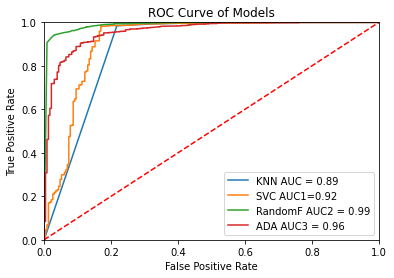

In [ ]:
# predict 는 0과 1
# predict_proba는 0과 1사이의 스코어로 받을 수 있음
# roc와 auc 그래프 그려보기
# y_scores[:, 1] 두개가나옴 -> 0클래스에 대한 스코어, 1클래스에 대한 스코어 2개가 나오기때문에
# 우리가 얼마나 악성코드에 가까운 스코어가 필요하기 때문에 0번은 버리고 모든샘플에 대해서 1번만

#roc curve 그리기
y_scores = kNN.predict_proba(x_test)
y_scores1=svc.predict_proba(x_test1)
y_scores2=RandomForest.predict_proba(x_test2)
y_scores3=adaboost.predict_proba(x_test3)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_scores1[:, 1])
fpr2, tpr2, threshold2 = roc_curve(y_test2, y_scores2[:, 1])
fpr3, tpr3, threshold3 = roc_curve(y_test3, y_scores3[:, 1])

roc_auc = auc(fpr, tpr)
roc_auc1=auc(fpr1, tpr1)
roc_auc2=auc(fpr2, tpr2)
roc_auc3=auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'KNN AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, label='SVC AUC1=%0.2f'%roc_auc1)
plt.plot(fpr2, tpr2, label = 'RandomF AUC2 = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ADA AUC3 = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Models')
plt.show()
